<a href="https://colab.research.google.com/github/roobyyi/Data-Scientist-Practicum-Project/blob/main/Project_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank Beta

Nasabah Bank Beta dinilai banyak yang pergi meninggalkan perusahaan, hal ini terlihat ketika nasabah selalu berkurang setiap bulannya.

Para pegawai memberi tanggapan bahwa lebih baik mempertahankan nasabah lama dibanding mencari nasabah baru karena dianggap lebih murah (masalah biayanya).

Untuk membantu pegawai di Bank Beta, maka dibuat Machine Learning untuk memprediksi apakah nasabah akan meninggalkan status masabah di Bank Beta atau tidak. Dengan hal ini, diharapkan para pegawai bisa menindaklanjuti para nasabah yang akan meninggalkan Bank dengan memberi penawaran atau semacamnya yang mana hal ini tergantung dari pihak Bank nya.

Diberikan data data mengenai perilaku nasabah untuk membantu pembuatan model Machine Learning.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Preparation-&amp;-Library-Import" data-toc-modified-id="Data-Preparation-&amp;-Library-Import-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Preparation &amp; Library Import</a></span><ul class="toc-item"><li><span><a href="#Import-Library" data-toc-modified-id="Import-Library-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import Library</a></span></li><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data Preparation</a></span></li></ul></li><li><span><a href="#Modelling" data-toc-modified-id="Modelling-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Modelling</a></span><ul class="toc-item"><li><span><a href="#Training,-Validation,-&amp;-Test-Dataset" data-toc-modified-id="Training,-Validation,-&amp;-Test-Dataset-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Training, Validation, &amp; Test Dataset</a></span></li><li><span><a href="#Pemodelan-Machine-Learning-Tanpa-Balancing-Data" data-toc-modified-id="Pemodelan-Machine-Learning-Tanpa-Balancing-Data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Pemodelan Machine Learning Tanpa Balancing Data</a></span></li><li><span><a href="#Pemodelan-Machine-Learning-dengan-Balancing-Data" data-toc-modified-id="Pemodelan-Machine-Learning-dengan-Balancing-Data-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Pemodelan Machine Learning dengan Balancing Data</a></span><ul class="toc-item"><li><span><a href="#Upsampling" data-toc-modified-id="Upsampling-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Upsampling</a></span></li><li><span><a href="#Downsampling" data-toc-modified-id="Downsampling-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Downsampling</a></span></li><li><span><a href="#Hyperparameter-Tuning" data-toc-modified-id="Hyperparameter-Tuning-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Hyperparameter Tuning</a></span></li><li><span><a href="#Penyesuaian-Threshold" data-toc-modified-id="Penyesuaian-Threshold-2.3.4"><span class="toc-item-num">2.3.4&nbsp;&nbsp;</span>Penyesuaian Threshold</a></span><ul class="toc-item"><li><span><a href="#Threshold-dengan-Upsampling" data-toc-modified-id="Threshold-dengan-Upsampling-2.3.4.1"><span class="toc-item-num">2.3.4.1&nbsp;&nbsp;</span>Threshold dengan Upsampling</a></span></li><li><span><a href="#Threshold-dengan-Downsampling" data-toc-modified-id="Threshold-dengan-Downsampling-2.3.4.2"><span class="toc-item-num">2.3.4.2&nbsp;&nbsp;</span>Threshold dengan Downsampling</a></span></li></ul></li><li><span><a href="#AUC-ROC" data-toc-modified-id="AUC-ROC-2.3.5"><span class="toc-item-num">2.3.5&nbsp;&nbsp;</span>AUC ROC</a></span><ul class="toc-item"><li><span><a href="#AUC-ROC-Upsampling" data-toc-modified-id="AUC-ROC-Upsampling-2.3.5.1"><span class="toc-item-num">2.3.5.1&nbsp;&nbsp;</span>AUC ROC Upsampling</a></span></li><li><span><a href="#AUC-ROC-Downsampling" data-toc-modified-id="AUC-ROC-Downsampling-2.3.5.2"><span class="toc-item-num">2.3.5.2&nbsp;&nbsp;</span>AUC ROC Downsampling</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Baseline-Model" data-toc-modified-id="Baseline-Model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Baseline Model</a></span></li><li><span><a href="#Final-Model-dengan-Uji-Dataset-Tes" data-toc-modified-id="Final-Model-dengan-Uji-Dataset-Tes-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Final Model dengan Uji Dataset Tes</a></span><ul class="toc-item"><li><span><a href="#Upsampling" data-toc-modified-id="Upsampling-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Upsampling</a></span><ul class="toc-item"><li><span><a href="#Dengan-Threshold" data-toc-modified-id="Dengan-Threshold-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Dengan Threshold</a></span></li><li><span><a href="#Tanpa-Threshold" data-toc-modified-id="Tanpa-Threshold-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Tanpa Threshold</a></span></li></ul></li><li><span><a href="#Downsampling" data-toc-modified-id="Downsampling-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Downsampling</a></span><ul class="toc-item"><li><span><a href="#Dengan-Threshold" data-toc-modified-id="Dengan-Threshold-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Dengan Threshold</a></span></li><li><span><a href="#Tanpa-Threshold" data-toc-modified-id="Tanpa-Threshold-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Tanpa Threshold</a></span></li></ul></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

## Data Preparation & Library Import

Sebelum memulai pekerjaan, siapkan dulu library yang akan digunakan dan pastikan bahwa data yang disediakan sudah bisa dipakai dengan baik.

### Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, accuracy_score, recall_score, precision_recall_curve, roc_curve, roc_auc_score, classification_report
from sklearn.utils import shuffle



### Data Preparation

In [2]:
churn = pd.read_csv('/content/Churn.csv')

In [3]:
churn.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Ada sekitar 900 data kosong di kolom Tenure, apakah data tersebut adalah data yang penting?

In [6]:
churn[churn['Tenure'].isna()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


Ada 909 data Tenure yang kosong, untuk mengisi nilai ini, dianggap bahwa Tenure adalah 0. Sebenarnya, hal ini seharusnya ditanyakan terlebih dahulu kepada penyedia data, apakah Tenure yang kosong artinya nasabah tidak memiliki kewajiban untuk membayar deposito? Namun, untuk kali ini, kita anggap bahwa tenure yang kosong adalah nasabah yang tidak memiliki kewajiban untuk membayar deposito sehingga nilai kosong (NaN) akan diisi dengan nol.

In [7]:
churn.loc[churn['Tenure'].isna(), 'Tenure'] = 0

In [8]:
churn['Tenure'].isna().sum()

0

Data NaN pada Tenure sudah diisi dengan nol

Masalah selanjutnya adalah ada data data yang bukan merupakan data numeric, yaitu Surname, Geograph, dan Gender. Juga ada data data yang tidak akan berpengaruh berkaitan dengan target yang akan dicapai yaitu RowNumber dan Customer ID (Untuk kolom ini akan dikecualikan pada features pada Machine Learning yang akan dibuat).

Untuk Surname sendiri, kemungkinan besar tidak akan berpengaruh kepada Machine Learning sehingga data ini akan dikecualikan. Sedangkan untuk Geography dan Gender, mungkin agak sedikit sexist tapi untuk Gender akan diproses menggunakan One Hot Encoding, dan Geography pun demikian, karena bisa saja ada beberapa masyarakat yang ada kebijakan baru di negaranya yang mana membuat para nasabah akan menggunakan Bank lokal di negaranya masing masing. Untuk One Hot Encoding, encoding ini digunakan karena data kategorikal ini berupa kategorikal nominal sehingga tidak ada sangkut pautnya dengan peringkat.

In [9]:
churn['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

Mungkin untuk negaranya tidak akan terlalu berpengaruh karena ketiga negara ini adalah negara yang berdekatan. Tapi tetap dimasukan saja menjadi features dengan alasan yang sama dengan diatas.

In [10]:
churn.drop(['Surname','RowNumber','CustomerId'], axis=1, inplace=True)

In [11]:
data_encoded = pd.get_dummies(churn, drop_first=True)

Satu kolom dihilangkan pada get dummies, hal ini dikarenakan untuk kasus ini, misalkan, negara ada 3, yaitu Jerman, Spanyol, dan Perancis. Untuk kolom Perancis dihilangkan karena kita bisa mendapatkan nilai Perancis ketika Jerman dan Spanyol sama sama bernilai 0, begitu pula dengan gender, Nilai Gender Male yang 0 adalah Female.

In [12]:
data_encoded

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5.0,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10.0,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7.0,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3.0,75075.31,2,1,0,92888.52,1,1,0,1


## Modelling

Setelah data disiapkan, selanjutnya adalah pelatihan model Machine Learning.



### Training, Validation, & Test Dataset

Yang akan dijadikan target di dataset ini adalah kolom Exited. Kolom ini merupakan kolom apakah nasabah keluar dari Bank, dan yang dijadikan features adalah semua kolom kecuali kolom Exited.

Rasio pemisahan yang akan dilakukan adalah 75% untuk Train dataset, 15% untuk Validation dataset, dan 10% untuk Test dataset. Untuk melakukan pemisahan ini, digunakan train_test_split dua kali. Pertama dengan size 0.75, dan yang kedua adalah dengan size 0.6.

In [13]:
features = data_encoded.drop('Exited', axis=1)
target = data_encoded['Exited']

In [14]:
print(features.shape)
print(target.shape)

(10000, 11)
(10000,)


In [15]:
features_train, features_sisa, target_train, target_sisa = train_test_split(features, target, train_size= 0.75, random_state=1)
features_valid, features_test, target_valid, target_test = train_test_split(features_sisa, target_sisa, train_size = 0.6, random_state=1)

In [16]:
print(f'Size train dataset adalah {round(len(features_train)/len(features)*100)}%')
print(f'Size validation dataset adalah {round(len(features_valid)/len(features)*100)}%')
print(f'Size test dataset adalah {round(len(features_test)/len(features)*100)}%')

Size train dataset adalah 75%
Size validation dataset adalah 15%
Size test dataset adalah 10%


Data sudah siap digunakan. Terkait dengan Scaling fitur, dari apa yang saya baca, scaling features tidak selalu dibutuhkan, khususnya untuk Random Forest, sehingga Features Scaling untuk proyek ini tidak digunakan.

ref: https://towardsdatascience.com/how-data-normalization-affects-your-random-forest-algorithm-fbc6753b4ddf#:~:text=Stack%20Overflow%3A%20(1)%20No,does%20not%20require%20feature%20scaling.

### Pemodelan Machine Learning Tanpa Balancing Data

Karena tipe data target yang akan diprediksi adalah kategorik, maka pemodelan yang digunakan adalah Classifier. Untuk model yang dipilih untuk dijadikan Machine Learning adalah Random Forest Classifier. Model ini dipakai karena dari apa yang saya baca di forum data scientist, Random Forest Classifier adalah pilihan pertama untuk dataset yang tidak terlalu banyak. Mungkin banyak disini relatif, tapi untuk data yang hanya 10000 baris, data masih bisa dibilang sedikit.

ref: https://careerfoundry.com/en/blog/data-analytics/what-is-random-forest/#:~:text=3.,%2C%20patient%20history%2C%20and%20safety.

Untuk pemodelan Random Forest, ada beberapa hyperparameter yang bisa di tuning, namun sebelumnya untuk memudahkan menjawab tugas pada proyek kali ini yaitu "Melihat perbedaan data yang sudah di balancing dan yang belum", maka model akan dilatih ulang ketika sudah didapatkan perbedaannya

In [17]:
model = RandomForestClassifier(random_state=12345)

In [18]:
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

In [19]:
print(f'F1 Score untuk data yang belum di balancing adalah {f1_score(predicted_valid, target_valid)}')

F1 Score untuk data yang belum di balancing adalah 0.5872689938398357


Ternyata data yang belum dibalancing memiliki F1 Score yang kurang sedikit dari 0.59.

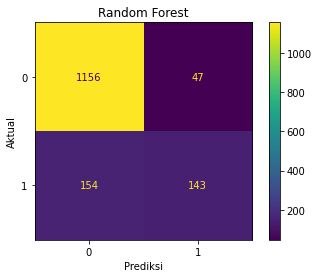

In [20]:
cm_rf = confusion_matrix(target_valid, model.predict(features_valid))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp.plot()
plt.title('Random Forest')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

Ada 47 False Positive dan 154 False Negative

### Pemodelan Machine Learning dengan Balancing Data

Sebelumnya, hal yang akan dilakukan adalah melihat apakah persebaran data pada Train Set seimbang atau tidak.

In [21]:
features_zeros = features_train[target_train==0]
features_ones = features_train[target_train==1]
print(len(features_zeros)/(len(features_train)))

0.7977333333333333


Ditemukan adanya sedikit imbalanced pada dataset, sekitar 80% untuk observasi negatif dan 20% untuk observasi positif.

#### Upsampling

Pertama, balancing yang akan dilakukan adalah upsampling.

In [22]:
print(features_ones.shape)
print(features_zeros.shape)

(1517, 11)
(5983, 11)


In [23]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features1 = pd.concat([features_zeros] + [features_ones] * repeat)
    target1 = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features1, target1, random_state=12345
    )

    return features_upsampled, target_upsampled, features1, target1

features_upsampled, target_upsampled, features1, target1 = upsample(
    features_train, target_train, 4
)


In [24]:
print(features_upsampled[target_train == 0].shape)
print(features_upsampled[target_train==1].shape)

(5983, 11)
(6068, 11)


<ipython-input-24-bce238224b12>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(features_upsampled[target_train == 0].shape)
<ipython-input-24-bce238224b12>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(features_upsampled[target_train==1].shape)


Upsampling dilakukan sebanyak 4 kali dan didapatkan data yang sudah hampir sama jumlahnya.

In [25]:
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)

In [26]:
print(f'F1 Score untuk data yang sudah di balancing adalah {f1_score(predicted_valid, target_valid)}')

F1 Score untuk data yang sudah di balancing adalah 0.6165137614678898


F1 Score sekarang menjadi 0.61, yang mana hal ini meningkat 3% dibanding data yang belum dibalancing.

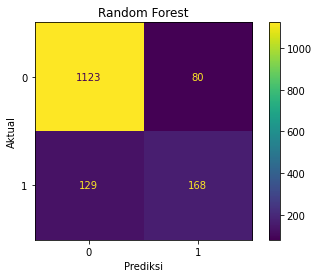

In [27]:
cm_rf = confusion_matrix(target_valid, model.predict(features_valid))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp.plot()
plt.title('Random Forest')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

Ada 80 False Positive, dan 129 False Negative, Jumlahnya berkurang dibandingkan dengan yang belum di balancing

#### Downsampling

Selanjutnya untuk mencoba lebih dalam, apakah downsampling lebih baik dibanding upsampling, maka balancing menggunakan downsampling akan digunakan juga.

In [28]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)]
        + [features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)]
        + [target_ones]
    )

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345
    )

    return features_downsampled, target_downsampled


features_downsampled, target_downsampled = downsample(
    features_train, target_train, 0.25
)

In [29]:
print(features_downsampled[target_train == 0].shape)
print(features_downsampled[target_train==1].shape)

(1496, 11)
(1517, 11)


<ipython-input-29-fb8a8002cd32>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(features_downsampled[target_train == 0].shape)
<ipython-input-29-fb8a8002cd32>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(features_downsampled[target_train==1].shape)


In [30]:
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)

In [31]:
print(f'F1 Score untuk data yang sudah di balancing adalah {f1_score(predicted_valid, target_valid)}')

F1 Score untuk data yang sudah di balancing adalah 0.602809706257982


Nilai F1 Score yang dihasilkan hanya berbeda 2% dengan data yang masih imbalance, ternyata upsampling lebih baik dibanding downsampling pada data yang imbalance ini.

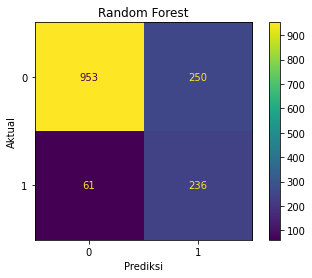

In [32]:
cm_rf = confusion_matrix(target_valid, model.predict(features_valid))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp.plot()
plt.title('Random Forest')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

Ada 250 False Positive, dan 61 False Negative. False Positive meningkat sangat drastis, namun untuk True Positive juga meningkat!

#### Hyperparameter Tuning

Untuk mendorong kualitas model lebih jauh, digunakan hyperparameter tuning untuk max_depth dan n_estimators.

Latih ulang model dengan data yang sudah di upsample.

In [33]:
best_rf_model = None
best_rf_f1 = 0
best_est = 0
best_rf_depth = 0
for est in range(25, 201, 25):
    for depth in range (1, 8):
        model_rf = RandomForestClassifier(max_depth = depth, n_estimators=est, random_state=12345)
        model_rf.fit(features_upsampled, target_upsampled)
        predictions_rf_valid = model_rf.predict(features_valid)
        f1 = f1_score(target_valid, predictions_rf_valid)
        print(f'{depth} - {est} - {f1}')
        if f1 > best_rf_f1:
            best_rf_model = model_rf
            best_rf_f1 = f1
            best_est = est
            best_rf_depth = depth
        
print(f'Max depth terbaik adalah {best_rf_depth}, dengan n_estimator sebanyak {best_est}, dengan f1 score = {f1_score(target_valid, best_rf_model.predict(features_valid))}.')            

1 - 25 - 0.5302325581395348
2 - 25 - 0.550795593635251
3 - 25 - 0.5755395683453237
4 - 25 - 0.5957446808510638
5 - 25 - 0.6139657444005271
6 - 25 - 0.6268260292164676
7 - 25 - 0.6236263736263735
1 - 50 - 0.5394285714285715
2 - 50 - 0.5512195121951219
3 - 50 - 0.583232077764277
4 - 50 - 0.5954198473282443
5 - 50 - 0.613157894736842
6 - 50 - 0.6180371352785146
7 - 50 - 0.6197564276048715
1 - 75 - 0.5465116279069767
2 - 75 - 0.5599051008303677
3 - 75 - 0.5813397129186604
4 - 75 - 0.5992414664981036
5 - 75 - 0.6147859922178989
6 - 75 - 0.6211512717536813
7 - 75 - 0.6124661246612466
1 - 100 - 0.5407319952774499
2 - 100 - 0.5631768953068592
3 - 100 - 0.5828295042321645
4 - 100 - 0.5974683544303797
5 - 100 - 0.6145833333333334
6 - 100 - 0.6263440860215054
7 - 100 - 0.6216216216216216
1 - 125 - 0.542654028436019
2 - 125 - 0.5519713261648745
3 - 125 - 0.583941605839416
4 - 125 - 0.6023166023166022
5 - 125 - 0.6137566137566137
6 - 125 - 0.6275033377837116
7 - 125 - 0.6251691474966171
1 - 150 - 0

Max depth terbaik adalah 6, dengan n_estimator sebanyak 125, dengan f1 score = 0.6275033377837116. Dengan tuning hyperparameter ini, f1 score naik lagi sebesar 1%.

#### Penyesuaian Threshold

Sebelum penyesuaian threshold, kita latih ulang model dengan hyperparameter yang sudah ada.

In [34]:
model_tuned = RandomForestClassifier(max_depth = 6, n_estimators = 125, random_state=12345)


##### Threshold dengan Upsampling

In [35]:
model_tuned.fit(features_upsampled, target_upsampled)
predicted_valid = model_tuned.predict(features_valid)

In [36]:
probabilities_valid = model_tuned.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
for threshold in np.arange(0, 1, 0.02):
    predicted_valid = probabilities_one_valid > threshold
    f1 = f1_score(target_valid, predicted_valid)
    precision = precision_score(target_valid, predicted_valid)
    accuracy = accuracy_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    print(f'Threshold = {threshold} | F1 = {f1:.3f} | Precision = {precision:.2f} | Accuracy = {accuracy:.2f} | Recall = {recall:.2f}')

Threshold = 0.0 | F1 = 0.331 | Precision = 0.20 | Accuracy = 0.20 | Recall = 1.00
Threshold = 0.02 | F1 = 0.331 | Precision = 0.20 | Accuracy = 0.20 | Recall = 1.00
Threshold = 0.04 | F1 = 0.331 | Precision = 0.20 | Accuracy = 0.20 | Recall = 1.00
Threshold = 0.06 | F1 = 0.331 | Precision = 0.20 | Accuracy = 0.20 | Recall = 1.00
Threshold = 0.08 | F1 = 0.331 | Precision = 0.20 | Accuracy = 0.20 | Recall = 1.00
Threshold = 0.1 | F1 = 0.331 | Precision = 0.20 | Accuracy = 0.20 | Recall = 1.00
Threshold = 0.12 | F1 = 0.331 | Precision = 0.20 | Accuracy = 0.20 | Recall = 1.00
Threshold = 0.14 | F1 = 0.340 | Precision = 0.20 | Accuracy = 0.23 | Recall = 1.00
Threshold = 0.16 | F1 = 0.348 | Precision = 0.21 | Accuracy = 0.26 | Recall = 1.00
Threshold = 0.18 | F1 = 0.360 | Precision = 0.22 | Accuracy = 0.30 | Recall = 1.00
Threshold = 0.2 | F1 = 0.374 | Precision = 0.23 | Accuracy = 0.34 | Recall = 1.00
Threshold = 0.22 | F1 = 0.391 | Precision = 0.24 | Accuracy = 0.39 | Recall = 0.99
Thresho

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Threshold terbaik yang didapatkan adalah 0.64, dari Threshold tersebut didapatkan nilai F1 naik lagi hingga 0.634!

In [37]:
upsampling_threshold = 0.64

##### Threshold dengan Downsampling

In [38]:
model_tuned.fit(features_downsampled, target_downsampled)
predicted_valid = model_tuned.predict(features_valid)

In [39]:
probabilities_valid = model_tuned.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
for threshold in np.arange(0, 1, 0.02):
    predicted_valid = probabilities_one_valid > threshold
    f1 = f1_score(target_valid, predicted_valid)
    precision = precision_score(target_valid, predicted_valid)
    accuracy = accuracy_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    print(f'Threshold = {threshold} | F1 = {f1:.3f} | Precision = {precision:.2f} | Accuracy = {accuracy:.2f} | Recall = {recall:.2f}')

Threshold = 0.0 | F1 = 0.331 | Precision = 0.20 | Accuracy = 0.20 | Recall = 1.00
Threshold = 0.02 | F1 = 0.331 | Precision = 0.20 | Accuracy = 0.20 | Recall = 1.00
Threshold = 0.04 | F1 = 0.331 | Precision = 0.20 | Accuracy = 0.20 | Recall = 1.00
Threshold = 0.06 | F1 = 0.331 | Precision = 0.20 | Accuracy = 0.20 | Recall = 1.00
Threshold = 0.08 | F1 = 0.331 | Precision = 0.20 | Accuracy = 0.20 | Recall = 1.00
Threshold = 0.1 | F1 = 0.331 | Precision = 0.20 | Accuracy = 0.20 | Recall = 1.00
Threshold = 0.12 | F1 = 0.337 | Precision = 0.20 | Accuracy = 0.22 | Recall = 1.00
Threshold = 0.14 | F1 = 0.344 | Precision = 0.21 | Accuracy = 0.24 | Recall = 1.00
Threshold = 0.16 | F1 = 0.356 | Precision = 0.22 | Accuracy = 0.28 | Recall = 1.00
Threshold = 0.18 | F1 = 0.368 | Precision = 0.23 | Accuracy = 0.32 | Recall = 1.00
Threshold = 0.2 | F1 = 0.381 | Precision = 0.24 | Accuracy = 0.36 | Recall = 1.00
Threshold = 0.22 | F1 = 0.392 | Precision = 0.24 | Accuracy = 0.39 | Recall = 1.00
Thresho

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Anehnya dengan menggunakan Downsampling dan Threshold, F1 Score bisa didorong hingga 0.655 dengan Threshold 0.58.

In [40]:
downsampling_threshold = 0.58

#### AUC ROC

Dengan mempertimbangkan balancing data bersama dengan pengaturan threshold, maka bagian ini dan seterusnya akan dibuat menjadi dua bagian, yaitu untuk Downsampling dan Upsampling

In [41]:
up_model = RandomForestClassifier(max_depth = 6, n_estimators=125, random_state=12345)
down_model = RandomForestClassifier(max_depth = 6, n_estimators = 125, random_state=12345)
up_model.fit(features_upsampled, target_upsampled)
down_model.fit(features_downsampled, target_downsampled)

RandomForestClassifier(max_depth=6, n_estimators=125, random_state=12345)

##### AUC ROC Upsampling

In [42]:
probabilities_valid = up_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

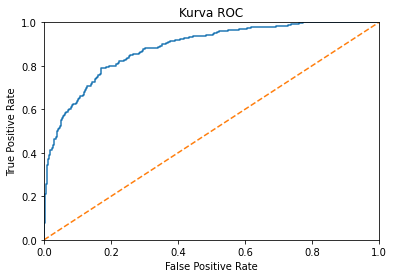

In [43]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.title('Kurva ROC')
plt.show()

In [44]:
roc_auc_score(target_valid, probabilities_one_valid)

0.8827118511241537

Nilai ROC AUC sudah bisa dikatakan bagus karena hampir mendekati 0.9.

##### AUC ROC Downsampling

In [45]:
probabilities_valid = down_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

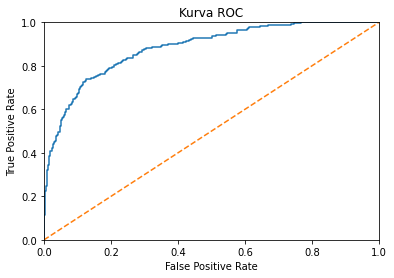

In [46]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.title('Kurva ROC')
plt.show()

In [47]:
roc_auc_score(target_valid, probabilities_one_valid)

0.8816902748739821

Nilai ROC terbaik yang didapatkan dari upsampling, meskipun benar benar hanya sedikit perbedaannya dengan metode downsampling.

## Baseline Model

Setelah menguji model, sekarang saatnya komparasi antara model yang dibuat dengan model yang tidak mencari pola tentang data. Model yang digunakan untuk Baseline adalah DummyClassifier

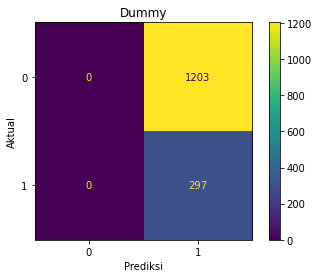

In [48]:
baseline_dummy = DummyClassifier(random_state=12345)
baseline_dummy.fit(features_upsampled, target_upsampled)
target_dummy_predict = baseline_dummy.predict(features_valid)
cm_dm = confusion_matrix(target_valid, baseline_dummy.predict(features_valid))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dm)
disp.plot()
plt.title('Dummy')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

In [49]:
print(f1_score(target_dummy_predict, target_valid))

0.330550918196995


Ternyata F1 Score baseline model hanya 0.33, sepertinya model yang dibuat sudah bisa membantu dalam memprediksi

## Final Model dengan Uji Dataset Tes

Final Model yang akan digunakan untuk kali ini sebenarnya ada dua karena tanpa threshold upsampling yang menang, dan dengan threshold model dengan downsampling yang lebih baik.

In [50]:
final_model = RandomForestClassifier(random_state=12345, max_depth =6, n_estimators = 125)

### Upsampling

Latih ulang model upsampling dengan hyperparameter Max depth = 6 dan n_estimators = 125

#### Dengan Threshold

In [51]:
final_model.fit(features_upsampled, target_upsampled)
probabilities_test = final_model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
predicted_test = probabilities_one_test > upsampling_threshold

In [52]:
f1_score(predicted_test, target_test)

0.5931758530183726

0.59 F1 Score didapatkan dengan menggunakan threshold

#### Tanpa Threshold

In [53]:
predicted_test = final_model.predict(features_test)
f1_score(predicted_test, target_test)

0.6187624750499001

0.61  F1 Score didapatkan tanpa menggunakan threshold

### Downsampling

Dengan model yang sama namun dengan data training yang berbeda, dilakukan juga pengetesan terhadap dataset tes.

#### Dengan Threshold

In [54]:
final_model.fit(features_downsampled, target_downsampled)
probabilities_test = final_model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
predicted_test = probabilities_one_test > downsampling_threshold

In [55]:
f1_score(predicted_test, target_test)

0.6515837104072397

0.65 F1 score didapatkan dengan menggunakan threshold.

#### Tanpa Threshold

In [56]:
predicted_test = final_model.predict(features_test)
f1_score(predicted_test, target_test)

0.5988909426987061

0.598 F1 Score didapatkan tanpa menggunakan threshold.

## Conclusion

Kesimpulan yang didapatkan adalah
- Kualitas model bisa ditingkatkan dengan metode balancing, yang saya lakukan disini adalah upsampling dengan downsampling.
- Threshold sangat berpengaruh dengan hasil dari prediksi model.
- Bisa dilihat bahwa model upsampling tanpa threshold bekerja lebih baik tanpa adanya threshold, namun model downsampling bekerja lebih baik dengan adanya threshold, dan overall model downsampling dengan threshold memiliki F1 Score yang lebih tinggi dibanding model lainnya.
- Alasan Balancing data sebelum hyperparameter adalah karena dari sumber yang saya baca, lebih baik bekerja dengan data yang sudah "balance" dibandingkan dengan yang belum balance, karena akan berpengaruh terhadap training modelnya.
- Alasan penyesuaian threshold dilakukan setelah tuning hyperparameter adalah jika threshold dilakukan sebelum tuning hyperparameter maka kinerja model akan selalu mengikuti threshold yang digunakan sebelum tuning. Sedangkan dalam proyek ini ingin melihat bagaimana pengaruh threshold ataupun balancing data terhadap performa model atau kualitas model.
